## 先把社交网络图画出来

In [2]:
import igraph as ig
import networkx as nx

In [3]:
g = ig.Graph(n=10, edges=[[0, 1], [0, 2],[0,3],[0,5]])

In [4]:
g.add_edges([(1,3),(1,4),(1,6)])
g.add_edges([(2,3),(2,5)])
g.add_edges([(3,4),(3,5),(3,6)])
g.add_edges([(4,6)])
g.add_edges([(5,6),(5,7)])
g.add_edges([(6,7)])
g.add_edges([(7,8)])
g.add_edges([(8,9)])

In [5]:
g.get_edgelist()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [6]:
g.vs["name"] = ["Andre", "Beverly", "Carol", "Diane", "Ed", "Fernando", "Garth","Heather","Ike","Jane"]


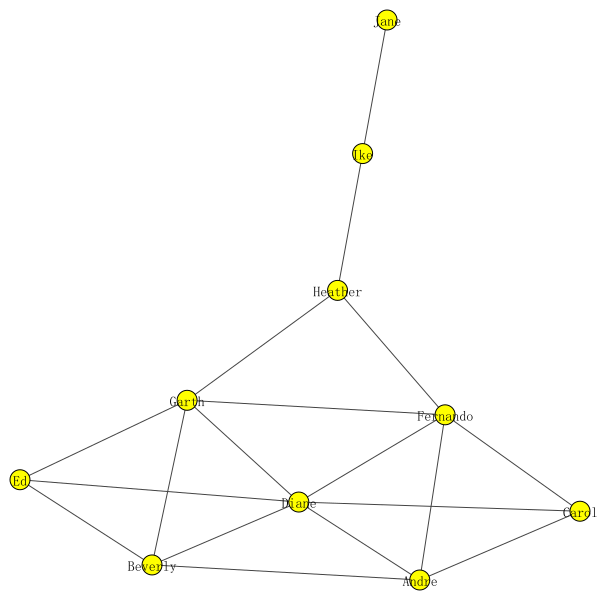

In [7]:
layout = g.layout("kk")
g.vs["label"] = g.vs["name"]
g.vs["color"] = "yellow"
ig.plot(g, layout=layout)

In [8]:
#创建nx下的图
A = g.get_edgelist()
G = nx.Graph(A)
name_list = g.vs["name"]
for i in G.nodes :
    G.nodes[i]["name"] = name_list[i]


## Degree centrality   




In [9]:
n = 10
for i in range(10) :
    print("%.3f     "%(g.vs[i].degree()/(n-1)),(g.vs["name"][i]))


0.444      Andre
0.444      Beverly
0.333      Carol
0.667      Diane
0.333      Ed
0.556      Fernando
0.556      Garth
0.333      Heather
0.222      Ike
0.111      Jane


In [10]:
#验证
import networkx as nx

#计算度中心度
print("Degree centrality")
d = nx.degree_centrality(G)
for v in G.nodes():
    print("%5.3f       %s" % (d[v],name_list[v]))




Degree centrality
0.444       Andre
0.444       Beverly
0.333       Carol
0.667       Diane
0.556       Fernando
0.333       Ed
0.556       Garth
0.333       Heather
0.222       Ike
0.111       Jane


## Betweenness centrality    

In [11]:
def findShortestPath(graph,start,end):
    l=[]
    paths = []
    for path in findAllPath(graph,start,end):
        l.append(len(path))
    for path in findAllPath(graph,start,end):
        if len(path) == min(l):
            paths.append(path)
    return paths

def cal_num(v,graph,start,end):
    r = 0
    paths = findShortestPath(graph,start,end)
    for i in paths:
        if v in i:
            r += 1
    return r,len(paths)

def cal_num1(graph,start,end):
    l=[]
    paths = []
    for path in findAllPath(graph,start,end):
        l.append(len(path))
    return min(l)
# 找到所有从start到end的路径
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

graph = {'Andre': ['Beverly', 'Carol', 'Diane', 'Fernando'],
         'Beverly': ['Andre', 'Diane', 'Ed', 'Garth'],
         'Carol': ['Andre', 'Diane', 'Fernando'],
         'Diane': ['Andre', 'Beverly', 'Carol', 'Diane', 'Ed', 'Fernando', 'Garth'],
         'Ed': ['Beverly', 'Diane', 'Garth'],
         'Fernando': ['Andre', 'Carol', 'Diane', 'Garth', 'Heather'],
         'Garth': ['Beverly', 'Diane', 'Ed', 'Fernando', 'Heather'],
         'Heather': ['Fernando', 'Garth', 'Ike'],
         'Ike': ['Heather', 'Jane'],
         'Jane': ['Ike']}



In [12]:
name_list

['Andre',
 'Beverly',
 'Carol',
 'Diane',
 'Ed',
 'Fernando',
 'Garth',
 'Heather',
 'Ike',
 'Jane']

In [13]:

cal_num('Garth',graph,'Andre','Garth')


(3, 3)

In [14]:
def cal_b(v):
    r = 0
    #对于v节点 遍历和v不同的节点i，找和iv都不同的节点j，找ij的最短路径条数和包含ijv的最短路径条数
    for i in name_list:
        if i != v :
            for j in name_list :

                if j!=i and j!=v :
                    r += (cal_num(v,graph,i,j))[0]/(cal_num(v,graph,i,j))[1]
    return r/2
    #算了两次要除以二
print("Betweenness centrality")
for v in name_list:
    print("%5.3f      %s" % (cal_b(v),v))


Betweenness centrality
0.833      Andre
0.833      Beverly
0.000      Carol
3.667      Diane
0.000      Ed
8.333      Fernando
8.333      Garth
14.000      Heather
8.000      Ike
0.000      Jane


In [15]:
print("Betweenness centrality")
b = nx.betweenness_centrality(G)
for v in G.nodes():
    print("%5.3f      %s" % (b[v],name_list[v]))

Betweenness centrality
0.023      Andre
0.023      Beverly
0.000      Carol
0.102      Diane
0.231      Fernando
0.000      Ed
0.231      Garth
0.389      Heather
0.222      Ike
0.000      Jane


#### 可以看出这两种方法求出的中介中心性不一样？但是总体是呈正相关的，试试normalized=False

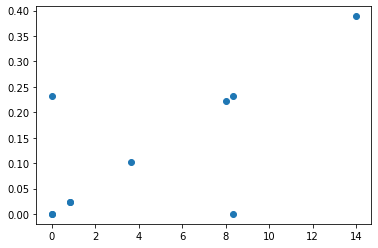

In [16]:
l1=[]
l2=[]
b = nx.betweenness_centrality(G)
for i in b:
    l2.append(b[i])

for v in name_list:
    l1.append(cal_b(v))
import matplotlib.pyplot as plt
plt.scatter(l1,l2)



#### 关闭归一化后，完全一样  ，用函数算出来的值是正确的

In [17]:
print("Betweenness centrality")
b = nx.betweenness_centrality(G,normalized=False)
for v in G.nodes():
    print("%5.3f      %s" % (b[v],name_list[v]))

Betweenness centrality
0.833      Andre
0.833      Beverly
0.000      Carol
3.667      Diane
8.333      Fernando
0.000      Ed
8.333      Garth
14.000      Heather
8.000      Ike
0.000      Jane


## Closeness centrality

In [18]:
#到各个节点的举例求和除以9，再倒数
# 用第二题写的函数
def cal_num1(graph,start,end):
    l=[]
    for path in findAllPath(graph,start,end):
        l.append(len(path))
    return min(l)-1
def cal_cc(v,graph):
    r = 0
    for i in name_list:
        if i!=v :
            # print(cal_num1(graph,v,i),v,i)
            r += cal_num1(graph,v,i)/9
    return 1/r




In [19]:
for i in name_list:
    print("%5.3f      %s" % (cal_cc(i,graph),i))

0.529      Andre
0.529      Beverly
0.500      Carol
0.600      Diane
0.500      Ed
0.643      Fernando
0.643      Garth
0.600      Heather
0.429      Ike
0.310      Jane


In [20]:
#验证
print("Closeness centrality")
c = nx.closeness_centrality(G)
for v in G.nodes() :
    print("%5.3f      %s" % (c[v],name_list[v]))

Closeness centrality
0.529      Andre
0.529      Beverly
0.500      Carol
0.600      Diane
0.643      Fernando
0.500      Ed
0.643      Garth
0.600      Heather
0.429      Ike
0.310      Jane


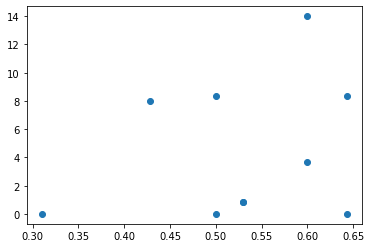

In [22]:
l1=[]
l2=[]
for i in c:
    l2.append(b[i])

for v in name_list:
    l1.append(cal_cc(v,graph))
import matplotlib.pyplot as plt
plt.scatter(l1,l2)

